In [11]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers.recurrent import SimpleRNN, LSTM, GRU
from keras.utils import np_utils
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
(x_Train , y_Train),(x_Test , y_Test) = mnist.load_data()
nb_classes = 10
img_rows, img_cols = 28, 28 # 圖片的長與寬

In [13]:
x_Train = x_Train.astype(float)
x_Test = x_Test.astype(float)
x_Train /= 255
x_Test /= 255
Y_train = np_utils.to_categorical(y_Train, nb_classes)
Y_test = np_utils.to_categorical(y_Test, nb_classes)



In [14]:
nb_units = 135
model = Sequential()

model.add(LSTM(nb_units,
                input_shape=(img_rows, img_cols)))
model.add(Dense(units=nb_classes))

model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 135)               88560     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1360      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 89,920
Trainable params: 89,920
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/10
60000/60000 [==============================] - 31s 512us/step - loss: 0.5389 - accuracy: 0.8232
Epoch 2/10
60000/60000 [==============================] - 32s 538us/step - loss: 0.1478 - accuracy: 0.9552
Epoch 3/10
60000/60000 [==============================] - 27s 448us/step - loss: 0.1027 - accuracy: 0.9678
Epoch 4/10
60000/60000 [==============================] - 29s 485us/step - loss: 0.0749 - accuracy: 0.9766
Epoch 5/10
60000/60000 [==============================] - 27s 455us/step - loss: 0.0599 - accuracy: 0.9811
Epoch 6/10
60000/60000 [==============================] - 27s 456us/step - loss: 0.0523 - accuracy: 0.9838
Epoch 7/10
60000/60000 [==============================] - 30s 507us/step - loss: 0.0450 - accuracy: 0.9861
Epoch 8/10
60000/60000 [==============================] - 26s 433us/step - loss: 0.0372 - accuracy: 0.9882
Epoch 9/10
60000/60000 [==============================] - 30s 500us/step - loss: 0.0333 - accuracy: 0.9899
Epoch 10/10
60000/60000 [============

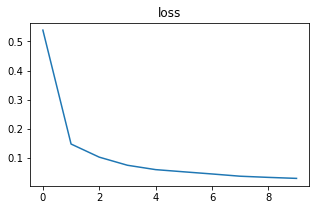

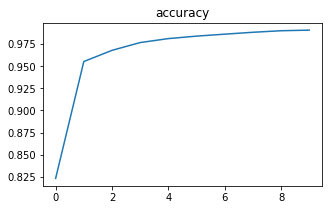

In [15]:
epochs = 10
history = model.fit(x_Train,
                    Y_train,
                    epochs=epochs,
                    batch_size=128,
                    verbose=1)
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['loss'])
plt.title('loss')
plt.figure(figsize=(5,3))
plt.plot(history.epoch,history.history['accuracy'])
plt.title('accuracy');

In [10]:
scores = model.evaluate(x_Test, Y_test, verbose=2)
print(scores[1]*100, "%")

98.72000217437744 %
